# <center>Chemical Engineering Programs</center>

This notebook contains an analysis of the Chemical Engineering undergraduate program at the University of Arizona using tools and metrics contained in the CurricularAnalytics.jl toolbox.  In addition, analyses of the curricula and degree plans associated with undergraduate chemical engineering programs at other schools around the country are provided. These offer a means for comparing the University of Arizona chemical engineering program to other programs around the country, at the curriculum level. We have found that these comparisons often provide useful data to curriculum committees as a part of their continuous improvement efforts. In order to execute the analyses provided in this notebook, you need to load the following Julia programming language packages:

In [1]:
using CurricularAnalytics, CurricularVisualization
using Glob
using CSV
using Plots
using GLM
using DataFrames
using Statistics

WebIO._IJuliaInit()

## Curricular Analytics

The analyses in this notebook makes use of the Curricular Analytics toolbox built using the Julia programming language and available as open source software [1]. If you would like to modify any of these analyses, you may find it useful to read the toolbox documenation, as well as the curricular analytics paper listed in the References section below [2]. The curricula associated with chemcial engineering undergraduate programs at various univiersites were collected from the  http://CurricularAnalytics.org website. These curricula were entered by those working at the various institutions that provide these curricula.  We have *not* validated them in any way, i.e., we are using them "as is" according to how they were entered into the afforementioned web application.  That said, it is realitvely straightforward to check these curricula by visiting the websites of the various universites offering these programs.  

### What is Curricular Complexity?
The curricular complexity metrics described below were derived based upon their impact on the ability of students to progress through a curriculum. Brief details of these metrics are provided below, for the sake of completeness; however, you can skip the technical details below without loss of understanding.

As a high-level summary, we model the overall complexity of a curriculum as a function of two main components: (1) the manner in which courses in the curriculum are taught and supported, and (2) the manner in which the curriculum is structured. We refer to the former as the *instructional complexity* of the curriculum, and to the latter as the *structural complexity* of the curriculum [2]. Each of these main components are functions of numerous other curriculum-related factors. In this report we focus on the structural complexity compnents; however, if there is an interest in investigating the impact of instructional complexity on student progress, there are simulation capabilities within the CurricularAnalytics.jl toolbox that can be used for that purpose. 

The structural complexity components we use below are:

#### Delay Factor
Many curricula, particularly those in science, technology engineering and math (STEM) fields, contain a set of courses that must be completed in sequential order. It is not uncommon in these programs to find prerequisite pathways consisting of seven or eight courses—they span nearly every term in any possible degree plan. The ability to successfully navigate these long pathways without delay is critical for student success and on-time graduation.

For any curriculum $c$ we can construct a *curriculum graph*, denoted $G_c = (V,E)$, that is determined by the prerequisites in the curriculum. Specifially, each vertex $v_1, . . . , v_n ∈ V$ represents a required course course in curriculum $c$. There is a directed edge $(v_i,v_j) ∈ E$ from course $v_i$ to $v_j$ if $v_i$ is a prerequisite of $v_j$.

Based up this definition, we define the **delay factor** associated with a given course $v_k$ in a curriculum $c$, denoted $d_c(v_k)$, as the number of vertices in the longest path in $G_c$ that passes through $v_k$. 

\begin{equation}
d_c(v_k) = \max_{i,j,k,l} \{ \#(v_i\rightsquigarrow v_k \rightsquigarrow v_j)\}
\end{equation}

We define the delay factor associated with an entire curriculum $c$ as:

\begin{equation}
d(G_c)= \sum_{v_k ∈ V} d_c(v_k)
\end{equation}

#### Blocking Factor
Another structural factor arises when one course serves as the gateway to many other courses in the curriculum. In this case, if a student is unable to pass the gateway course, they are **blocked** from attempting many of the other courses in the curriculum.

For instance, *Calculus 1* is often a foundational first-term course in a STEM curriculum that must be completed before taking other major-specific classes in subsequent terms. It is obvious that a course which is a prerequisite for a large number of other courses in a curriculum is a highly important course in that curriculum.

We will denote the situation where course $v_j$ is reachable from course $v_i$, via any prerequisite pathway, using $vi\rightsquigarrow v_j$, and $v_i \nrightarrow v_j$ will be used if course $v_j$ is not reachable from course $v_i$. The blocking factor associated with course $v_i$ in curriculum $G_c = (V, E)$, denoted $b_c(v_i)$, is then given by: 

\begin{equation}
b_c(v_i)= \sum_{v_j ∈ V} I(v_i,v_j)
\end{equation}

where $I$ is the indicator function :

\begin{equation}
= I \begin{cases}
1 & if \space \space v_i\rightsquigarrow v_j\\
0 & if \space \space v_i \nrightarrow v_j
\end{cases}
\end{equation}

We define the blocking factor associated with an entire curriculum $c$ as:

\begin{equation}
b(G_c)= \sum_{v_i ∈ V} b_c(v_i)
\end{equation}

#### Structural Complexity
After computing the blocking and delay factors for a curriculum, a unitless measure for structural complexity can be computed for any curriculum. Keep in mind that structural complexity explicitly relates to the likelihood that a student can complete a curriculum, as well be demonstrated below..

In order to determine this overall *structural complexity* metric, we simply add the blocking and delay factors of the entire curricula:

\begin{equation}
Structural \; Complexity = b(G_c) + d(G_c)
\end{equation}

Given these definintions, we provide an analysis of the University of Arizona chemical engineering curriculum below. A visaulization of this curriculum is provided next. If you hover your mouse over the courses in this visualization, you will see the complexity metrics associated with each course in this curriculum.

In [2]:
UA_ChemE_plan = read_csv("./programs/plans/ChemE-DP-UA.csv")
visualize(UA_ChemE_plan, notebook=true)

WebIO.Scope(WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :iframe), Any[""], Dict{Symbol, Any}(:src => "https://curricula-api-embed.damoursystems.com/", :id => "curriculum", :events => Dict{Symbol, WebIO.JSString}(:load => WebIO.JSString("(function (){this.contentWindow.postMessage({\"options\":{\"hideTerms\":false,\"edit\":false},\"curriculum\":{\"name\":\"Chemical Engineering - (Bachelor of Science in Chemical Engineering)\",\"dp_name\":\"2019-20 Degree Plan\",\"curriculum_terms\":[{\"name\":\"Term 1\",\"curriculum_items\":[{\"curriculum_requisites\":[{\"source_id\":4,\"target_id\":1,\"type\":\"CurriculumCorequisite\"}],\"name\":\"CHEM 151\",\"metrics\":{\"centrality\":141,\"complexity\":28.0,\"blocking factor\":16,\"delay factor\":12.0},\"nameSub\":\"General Chemistry I\",\"id\":1,\"credits\":4,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"centrality\":0,\"complexity\":1.0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"Tier I General Education \",\"id\":2,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\"MATH 122A\",\"metrics\":{\"centrality\":0,\"complexity\":43.0,\"blocking factor\":31,\"delay factor\":12.0},\"nameSub\":\"Functions for Calculus\",\"id\":3,\"credits\":1,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":3,\"target_id\":4,\"type\":\"CurriculumCorequisite\"}],\"name\":\"MATH 122B\",\"metrics\":{\"centrality\":1225,\"complexity\":42.0,\"blocking factor\":30,\"delay factor\":12.0},\"nameSub\":\"First-Semester Calculus\",\"id\":4,\"credits\":4,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\"ENGL 101\",\"metrics\":{\"centrality\":0,\"complexity\":3.0,\"blocking factor\":1,\"delay factor\":2.0},\"nameSub\":\"First-Year Composition\",\"id\":5,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{\"centrality\":0,\"complexity\":1.0,\"blocking factor\":0,\"delay factor\":1.0},\"nameSub\":\"ENGR 102A/B or ENGR 102\",\"id\":6,\"credits\":3,\"nameCanonical\":\"\"}],\"id\":1},{\"name\":\"Term 2\",\"curriculum_items\":[{\"curriculum_requisites\":[{\"source_id\":4,\"target_id\":7,\"type\":\"CurriculumPrerequisite\"}],\"name\":\"MATH 129\",\"metrics\":{\"centrality\":393,\"complexity\":31.0,\"blocking factor\":20,\"delay factor\":11.0},\"nameSub\":\"Calculus II\",\"id\":7,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":4,\"target_id\":8,\"type\":\"CurriculumPrerequisite\"},{\"source_id\":1,\"target_id\":8,\"type\":\"CurriculumPrerequisite\"}],\"name\":\"CHEM 152\",\"metrics\":{\"centrality\":266,\"complexity\":27.0,\"blocking factor\":15,\"delay factor\":12.0},\"nameSub\":\"General Chemistry II\",\"id\":8,\"credits\":4,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":5,\"target_id\":9,\"type\":\"CurriculumPrerequisite\"}],\"name\":\"ENGL 102\",\"metrics\":{\"centrality\":0,\"complexity\":2.0,\"blocking factor\":0,\"delay factor\":2.0},\"nameSub\":\"First-Year Composition\",\"id\":9,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":4,\"target_id\":10,\"type\":\"CurriculumPrerequisite\"}],\"name\":\"PHYS 141\",\"metrics\":{\"centrality\":197,\"complexity\":25.0,\"blocking factor\":15,\"delay factor\":10.0},\"nameSub\":\"Introductory Mechanics\",\"id\":10,\"credits\":4,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":4,\"target_id\":11,\"type\":\"CurriculumPrerequisite\"}],\"name\":\"AME 105\",\"metrics\":{\"centrality\":174,\"complexity\":22.0,\"blocking factor\":10,\"delay factor\":12.0},\"nameSub\":\"Introduction to MATLAB I\",\"id\":11,\"credits\":1,\"nameCanonical\":\"\"}],\"id\":2},{\"name\":\"Term 3\",\"curriculum_items\":[{\"curriculum_requisites\":[{\"source_id\":16,\"target_id\":12,\"type\":\"CurriculumCorequisite\"},{\"source_id\":8,\"target_id\":12,\"type\":\"CurriculumPrerequisite\"}],\"name\":\"CHEM 243A\",\"metrics\":{\"centrality\":0,\"complexity\":6.0,\"blocking facto

The curricular metrics for this program are as follows:

In [4]:
metrics = basic_metrics(UA_ChemE_plan.curriculum)
println(String(take!(metrics)))


University of Arizona 
Curriculum: Chemical Engineering - (Bachelor of Science in Chemical Engineering)
  credit hours = 130
  number of courses = 47
  Blocking Factor --
    entire curriculum = 250
    max. value = 31, for course(s): MATH 122A - Functions for Calculus
  Centrality --
    entire curriculum = 8617
    max. value = 1225, for course(s): MATH 122B - First-Semester Calculus
  Delay Factor --
    entire curriculum = 346.0
    max. value = 12.0, for course(s): CHEM 151 - General Chemistry I, MATH 122A - Functions for Calculus, MATH 122B - First-Semester Calculus, CHEM 152 - General Chemistry II, AME 105 - Introduction to MATLAB I, AME 205 - Introduction to MATLAB II, CHEE 201L - Elements of Chemical & Environmental Engineering I - Computational Lab, CHEE 202 - Elements of Chemical and Environmental Engineering II, CHEE 402 - Chemical Engineering Modeling, CHEE 305 - Chemical Engineering Transport Phenomena, CHEE 301B - Chemical Engineering Lab II, CHEE 401A - Chemical and En

In [5]:
metrics = basic_metrics(UA_ChemE_plan)
println(String(take!(metrics)))


Curriculum: Chemical Engineering - (Bachelor of Science in Chemical Engineering)
Degree Plan: 2019-20 Degree Plan
  total credit hours = 130
  number of terms = 8
  max. credits in a term = 18, in term 1
  min. credits in a term = 15, in term 2
  avg. credits per term = 16.25, with std. dev. = 0.82915619758885



## Dead End Courses
The following function can be used to find "dead end" courses in a curricula.  Dead end courses are those that appear at the end of a path (i.e., sink vertices), and are not a part of a course associated with the major.  E.g., in the case of the chemical engineering curriculum above, these would be courses at the end of a path that do not have the "CHEE" or "ENGR" prefix.  One might consider these courses dead ends, as their course outcomes are not (formally) used by any major-specific course, i.e., by any course with the prefix "CHEE."

In [6]:
de = dead_ends(UA_ChemE_plan.curriculum, ["ENGR", "CHEE"])
println("\nDead end courses in the $(UA_ChemE_plan.curriculum.name) curriculum:")
for course in de[2]
  println("  $(course.prefix) $(course.num): $(course.name)")
end


Dead end courses in the Chemical Engineering - (Bachelor of Science in Chemical Engineering) curriculum:
  ENGL 102: First-Year Composition
  CHEM 243A: Organic Chemistry Laboratory I
  CHEM 241B: Lectures in Organic Chemistry
  CHEM 480B: Physical Chemistry


Note that there may be elective courses in the major that do in fact commonly require these courses as prerequisites.

### Extraneous Prerequisites
The following function will find prerequisites in a curriculum.  These are redundant prerequisites that are unnecessary in a curriculum.  For example, if a curriculum has the prerequisite 
relationships $c_1 \rightarrow c_2 \rightarrow c_3$ and $c_1 \rightarrow c_3$, and $c_1$ and $c_2$ are 
*not* co-requisites, then $c_1 \rightarrow c_3$ is redundant and therefore extraneous.  Extraneous prerequisites do not effect the curricular complexity metric, they simply are unnecessary clutter in a curriculum or degree plan.

In [6]:
extraneous_requisites(UA_ChemE_plan.curriculum, print=true);


University of Arizona: curriculum Chemical Engineering - (Bachelor of Science in Chemical Engineering) has extraneous requisites:
-Elements of Chemical & Environmental Engineering I has redundant requisite First-Semester Calculus
-Organic Chemistry Laboratory I has redundant requisite General Chemistry II
-Elements of Chemical & Environmental Engineering I - Computational Lab has redundant requisite Introduction to MATLAB I
-Chemical Engineering Lab II has redundant requisite Chemical Engineering Mass Transfer
-Process Dynamics and Control Laboratory has redundant requisite Chemcial Engineering Lab I
-Process Dynamics and Control Laboratory has redundant requisite Chemical Engineering Lab II
-Process Dynamics and Control Laboratory has redundant requisite Chemical and Environmental Engineering Laboratory I



### Why Does Complexity Matter?
Here is the complexity distrubtion of all undergraduate programs at the Unviersity of Arizona

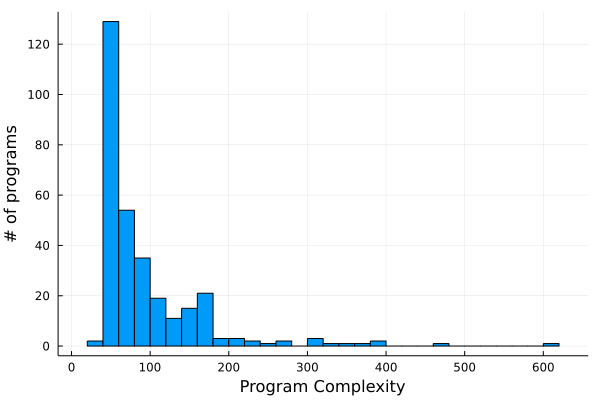

In [7]:
df = DataFrame(CSV.File("./Complexity_x_Grad_UA.csv"));
histogram(df.complexity_score, nbins=50, xlabel="Program Complexity", ylabel="# of programs", label="")

Note that the chemical engeinering programm has the highest complexity of any undergraduate program at the University of Arizona, and is among the highest complexity progams in the entire nation (based upon the data set collected at CurricularAnalytics.org).

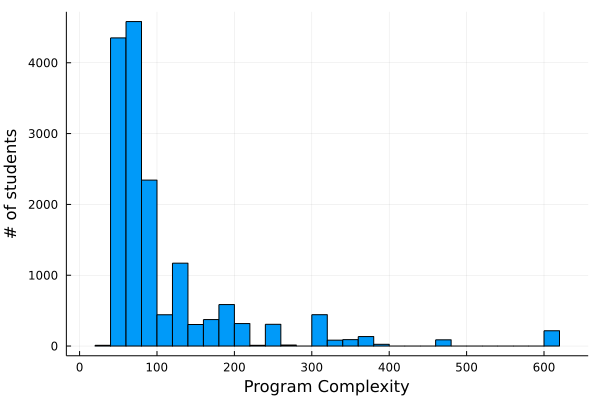

In [8]:
X = Array{Integer,1}() # curricular complexity score of program
Y = Array{Bool,1}() # did student graduate within 4 years?
Z = Array{Bool,1}() # did student graduate within 6 years?
for row in eachrow(df)
  for t in 1:row["four"] 
    push!(X, row["complexity_score"])
    push!(Y, 1); push!(Z, 1)
  end
  s = row["total_degrees_awarded"] - row["six"]
  for t in 1:(row["total_degrees_awarded"] - row["four"])
    push!(X, row["complexity_score"])
    push!(Y, 0)
    s > 0 ? (push!(Z, 1); s=s-1) : push!(Z, 0)
  end
end
df_binary = DataFrame(Program_Complexity = X, grad4 = Y, grad6 = Z);
histogram(X, nbins=50, xlabel="Program Complexity", ylabel="# of students", label="")

In [9]:
probit4 = glm(@formula(grad4 ~ Program_Complexity), df_binary, Binomial(), ProbitLink())

StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Vector{Float64}, Binomial{Float64}, ProbitLink}, GLM.DensePredChol{Float64, LinearAlgebra.Cholesky{Float64, Matrix{Float64}}}}, Matrix{Float64}}

grad4 ~ 1 + Program_Complexity

Coefficients:
────────────────────────────────────────────────────────────────────────────────────────
                          Coef.   Std. Error      z  Pr(>|z|)    Lower 95%     Upper 95%
────────────────────────────────────────────────────────────────────────────────────────
(Intercept)          0.654872    0.0158034    41.44    <1e-99   0.623898     0.685846
Program_Complexity  -0.00070069  0.000106431  -6.58    <1e-10  -0.00090929  -0.000492089
────────────────────────────────────────────────────────────────────────────────────────

In [10]:
probit6 = glm(@formula(grad6 ~ Program_Complexity), df_binary, Binomial(), ProbitLink())

StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Vector{Float64}, Binomial{Float64}, ProbitLink}, GLM.DensePredChol{Float64, LinearAlgebra.Cholesky{Float64, Matrix{Float64}}}}, Matrix{Float64}}

grad6 ~ 1 + Program_Complexity

Coefficients:
────────────────────────────────────────────────────────────────────────────────────────
                           Coef.   Std. Error      z  Pr(>|z|)    Lower 95%    Upper 95%
────────────────────────────────────────────────────────────────────────────────────────
(Intercept)          0.844203     0.0164467    51.33    <1e-99   0.811968     0.876438
Program_Complexity  -0.000841272  0.000108972  -7.72    <1e-13  -0.00105485  -0.00062769
────────────────────────────────────────────────────────────────────────────────────────

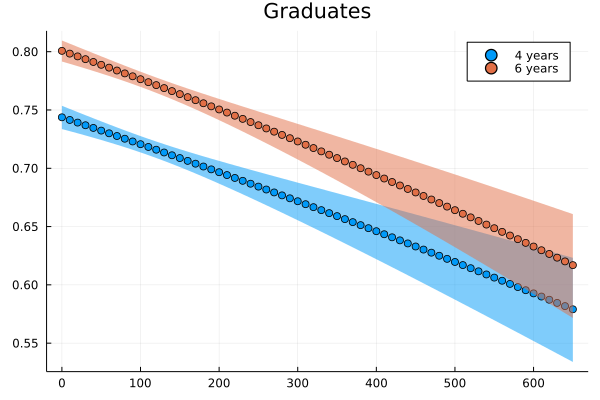

In [11]:
CC_scores = DataFrame(Program_Complexity = 0:10:650)
pred4 = predict(probit4, CC_scores, interval = :confidence)
pred6 = predict(probit6, CC_scores, interval = :confidence)
plot(title="Graduates")
plot!(CC_scores.Program_Complexity, pred4.prediction , seriestype = :scatter, labels="4 years",
       ribbon = (pred4.prediction .- pred4.lower, pred4.upper .- pred4.prediction))
plot!(CC_scores.Program_Complexity, pred6.prediction , seriestype = :scatter, labels="6 years",
       ribbon = (pred6.prediction .- pred6.lower, pred6.upper .- pred6.prediction))

### Create the Data Structures 
Below we read each of the stored curricula into an array of curricula that will be used throughout the remainder of this notebook.

In [12]:
currics = Array{Curriculum,1}()
program_files = glob("*", "./programs/curricula")
for program in program_files
    curric = read_csv(program)
    complexity(curric)  # compute the curricular complexity of the curriculum
    push!(currics, curric)    # store the curriculum in the darray 
end

The institutions represented in this chemical engineering curricula data set include:

In [13]:
for c in currics
    println(c.institution)
end

American University of Beirut
Bucknell University
Cal Poly Pomona
Drexel University
Illinois Institute of Technology
Louisiana State University
Montana State University
Oklahoma State University
Rose-Hulman Institute of Technology
University of Arizona
University of Kentucky
University of Nebraska-Lincoln
University of Nevada-Reno
University of South Carolina
University of South Florida
Virginia Tech
Yale University


First we will analyze the structural properties of a curriculum in the college.  The structural properties of a curriculum are determined by the underlying structural properties of its corresponding curriculum graph (i.e., the graph showing the prerequisite relationships between the courses in a curriculum, ignoring term information).  Here's the degree plan for the Electrical Engineering program.  By hovering your mouse over the courses in this figure, various metrics will be displayed.


 Metric -- complexity
  Number of curricula = 17
  Mean = 447.0117647058823
  STD = 50.20772774281546
  Max. = 720.0
  Min. = 229.0


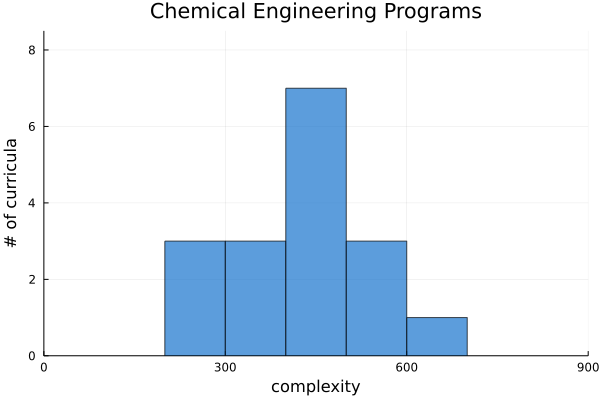

In [14]:
metric = "complexity"
currics[3].metrics["complexity"] = (currics[3].metrics["complexity"][1] * 2/3)  # adjust for quarter system at Pamona 
stats = basic_statistics(currics, "complexity")
currics[3].metrics["complexity"] = (currics[3].metrics["complexity"][1] * 2/3)  # adjust for quarter system at Pamona 
println(String(take!(stats))); flush(stdout)  
display(metric_histogram(currics, metric, title="Chemical Engineering Programs", xlabel="$(metric)", 
          ylabel="# of curricula", xlim=(0,900)))

There are 120 (semester) credit hour programs at Stanford University, the University of New Mexico, the University of South Florida, and Yale University.

## References
<a id='References'></a>

[1] Heileman, G. L., Abdallah, C.T., Slim, A., and Hickman, M. (2018). Curricular analytics: A framework for quantifying the impact of curricular reforms and pedagogical innovations. www.arXiv.org, arXiv:1811.09676 [cs.CY].

[2] Heileman, G. L., Free, H. W., Abar, O. and Thompson-Arjona, W. G, (2019). CurricularAnalytics.jl Toolbox. https://github.com/heileman/CurricularAnalytics.jl.